<img src="https://learnonline.gmit.ie/pluginfile.php/1/theme_adaptable/logo/1538655948/Transparent%20new.png" align="left">


<h1>Higher Diploma in Science in Computing (Data Analytics) - Machine Learning and Statistics</h1>
<h2>Boston House Prices Dataset Project 2019</h2>
<h3>Cóbhan Phillipson - G00174503</h3>
<hr>

<h3><u>Introduction</u></h3>

<p>This project is conducted as part of the Machine Learning and Statisitcs module on the Higher Diploma in Science in Computing (Data Analytics) in GMIT. The project is based on the Boston House Prices dataeet and we are instructed by the following guidelines:</p>
<ol><li><strong>Describe:</strong> Create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset.</li> 
<li><strong>Infer:</strong> Add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t.</li>
<li><strong>Predict:</strong> Use keras to create a neural network that can predict the median house price based on the other variables in the dataset. </li></ol>
<hr>


<h4>Import Libraries</h4>
<p>In this project, I will use a number of Python packages. The first port of call is to import these packages into this notebook.</p>

In [14]:
# Import libraries necessary for this project
# ran into an error when I updated Anaconda, possibly running from wrong environment. this install is a workaround
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

     |████████████████████████████████| 215kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 11.1MB 1.7MB/s eta 0:00:01   |▎                               | 92kB 1.3MB/s eta 0:00:09     |███▍                            | 1.2MB 1.2MB/s eta 0:00:09
     |████████████████████████████████| 296kB 1.8MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d29e2af4b4103b2a2822763460d5e454c829238739396312e15bc1d45882e6a4
  Stored in directory: /Users/cobhanphillipson/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


<h3><u>Section 1 - Describe</u></h3>
<h4>About the Boston House Prices Dataset</h4>
<p>This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts. It was first published in 1978 in the Journal of Environmental Economics and Management, volume 5 as part of an article investigating the willingness of people in the Boston metroploitan area to pay for clean air.</p>

<p>The article was written by David Harrison, Jr. and Daniel L. Rubinfeld and found that marginal air pollution damages (as revealed in the housing market) are found to increase with the level of air pollution and with household income.[1] The dataset is small in size with only 506 rows and 13 columns.</p>

<p>To get a full description of the dataset, we can use the sklearn' DESCR attribute which provides us with a free-text description of the data</p>

In [15]:
#Import Boston House Price Data Set - sklearn comes with built in datasets which include Boston House Prices Dataset
from sklearn.datasets import load_boston 
boston_dataset = load_boston()
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<p>One thing to note in the dataset notes is that the median value (MEDV) is the target variable here and the other values are feature variables which can be used to predict house prices. <p>

In [16]:
# create a pandas dataframe with the House Price Dataset
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) 
# return the first 5 rows of our dataset to ensure everything has imported correctly
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<p>The first thing we notice here is that our target value MEDV is missing from our dataframe and must be created.</p>

In [17]:
df['MEDV'] = boston_dataset.target #add median
df.head() #return first five rows again to check median is included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>
<h4>Key Statistics</h4>
<p>To begin our initial exploration of the data, it is worth identifying some key statistics. We can use pandas to describe our dataset</p>


In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<p>To double check that the data set is complete, we can run a check for missing values.</p>

In [19]:
# Use pandas to quick check if there are any missing values in the dataset
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

<p>Before we go any further, it is also worthwhile checking out the distribution of our target variable, the median house value.</p>

Text(0.5, 0, 'Median House prices in $1000')

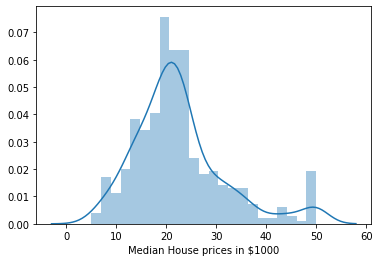

In [20]:
#Check distribution of target variable
sns.distplot(df['MEDV'])
plt.xlabel("Median House prices in $1000")


<p>Using seaborn distplot we can quickly see that the distribution of the median house prices per town is positively skewed. The outliers in this data set are in the high value towns and suburbs where the median price is high.</p>

<p>Next, it would be valuable to learn about the correlation behavior of the other attributes with our target variable. A Seaborn heatmap can present us with this correlation info. Seaborn</p> 

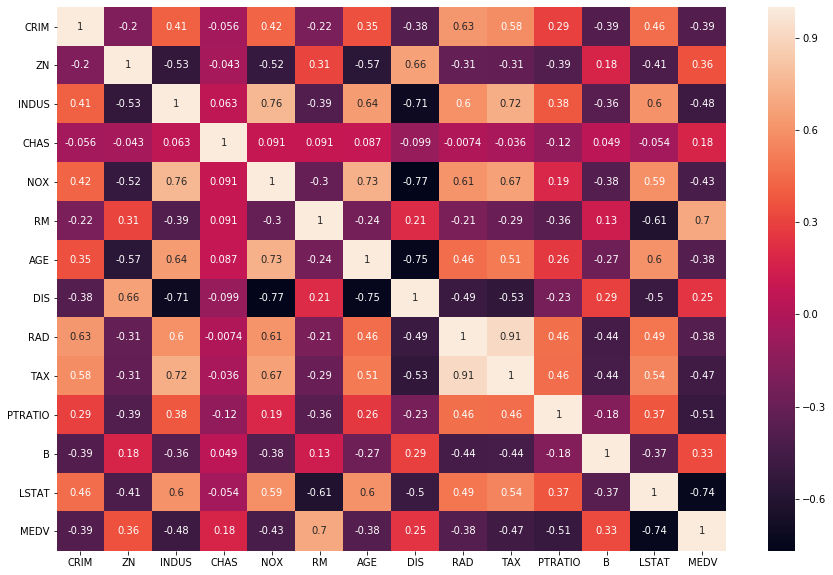

In [21]:
# correlation plot
correlation_matrix = df.corr()  
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True) #set annot to true to add descriptive value to each cell

<p>The last row of the heatmap shows us the correlation of all variables against the median values. Because we turned on the annotations, our map returns a numeric correlation score which helps us understand our data. The correlation score ranges from -1 to 1. Going one step further, we can do a quick print out of the correlation scores. A high correlation score indicates that there is a positive correlation between the values and both change in the same direction, while negative correlation score indicates that variables change in the opposite direction. (https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)</p>

In [22]:
print (correlation_matrix['MEDV'].sort_values(ascending=False), '\n') 

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64 



<p>There are a number of insights we gain from our heatmap:</p>
<ul><li>As the average number of rooms per dwelling increases so does the median value of homes.</li>
<li>Homes in towns with a higher proportion of residential land zoned for lots of over 25,000 sq. ft. have a higher value than those in towns with less residential zones.</li>
<li>Homes in towns with a proportionately higher black population have a higher median value than homes with proportionately lower black population.</li>
<li>Proximity to Boston employment centers increases house value.</li>
<li>Median house value decreases as the percentage of people from what was considered a "lower status" in a town increases. A high percentage of "lower status" people in a town is in fact the greatest contributing factor involved in lowering the house price.</li></ul>

<p>Taking our analysis one step further, we can use some scatter plots to get a graphical overview of the correlations between each variable and median house value.</p>

<Figure size 432x288 with 0 Axes>

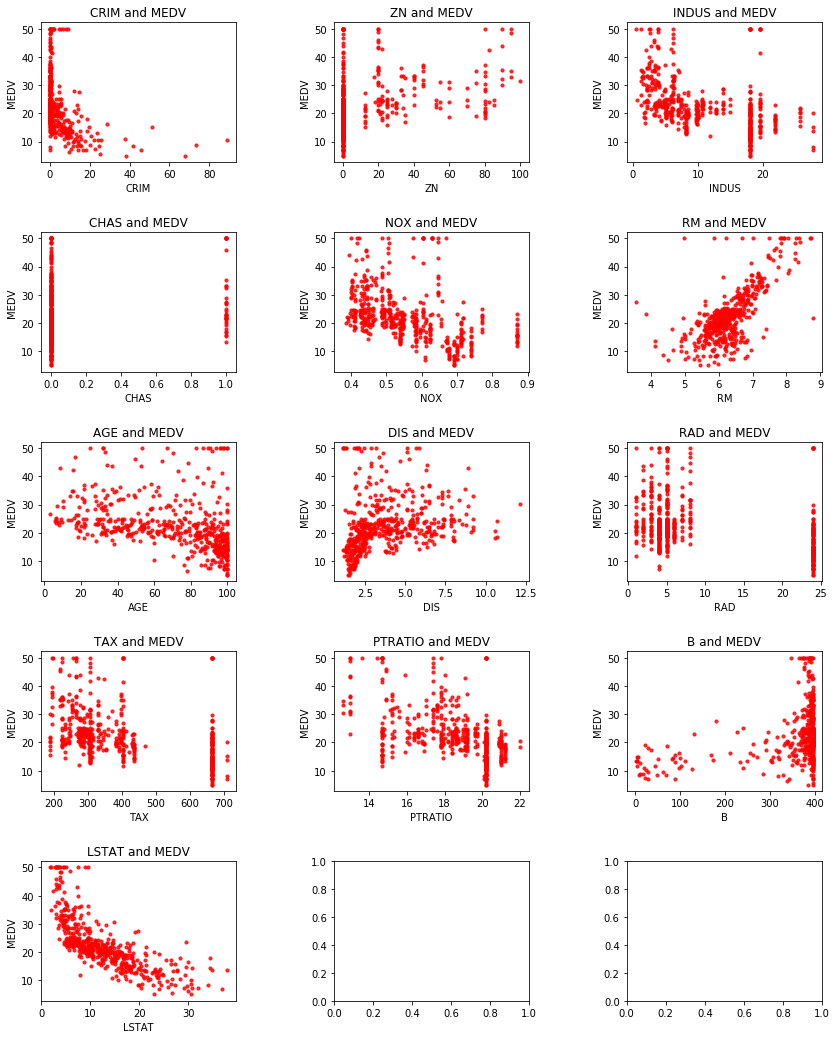

In [23]:
# Building on some initial analysis from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 18))
fig.subplots_adjust(wspace=.5, hspace=.5)
img_index = 0

rows, cols = df.shape

for i in range(cols -1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], c='red', alpha=0.8, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

<hr>

<h3><u>Section 2 - Infer</u></h3>
<p>In section 2 we will examine the impact of being located by the Charles river on the value of a house. A good starting point here would be to take a closer look at the scatterplot that shows how living by the Charles river affects house value.</p>

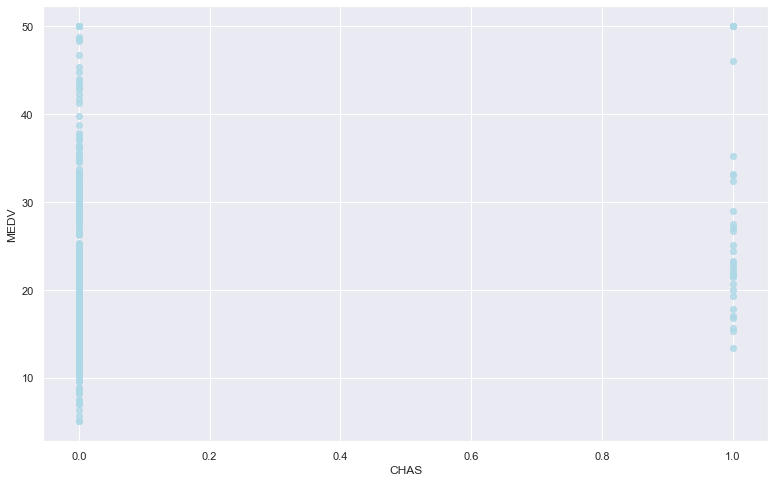

In [24]:
sns.set(rc={'figure.figsize':(13,8)})
sns.regplot(x=df['CHAS'], y=df['MEDV'], fit_reg=False, color='lightblue')

<p>The Charles River variable is a dummy variable where 1 indicates that the tract bounds the river and 0 to denote houses that don't bound the river. Straight away we can see that there are many more houses in the dataset that do not bound the Charles River. We can run a quick value count to verify this observation.</p>

In [25]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<p>Next, it would be useful to check the mean and the median values for houses beside the Charles River.</p>

In [26]:
df.pivot(columns="CHAS", values="MEDV").median()

CHAS
0.0    20.9
1.0    23.3
dtype: float64

In [27]:
df.pivot(columns="CHAS", values="MEDV").mean()

CHAS
0.0    22.093843
1.0    28.440000
dtype: float64

<p>The fact that both the mean and median values for houses by the Charles River is higher than those that aren't provides us with fairly solid evidence that being located by the Charles River will positively impact the value of a house. The median value is less likely to be affected by extreme outliers than the mean - and it is worth pointing out that the median home values for 0s and 1s are closer than the mean.</p> 

<p>However, the mean and the median here are only descriptive statistics. They tell us info about our dataset but are these statistics repeatable? By repeatable, we mean could these differences be reproduced in a new data sample - and the answer here is no. We cannot say with any certainty that measuring the mean and median of another sample of Boston house prices by the Charles would yield the same results. We also need to be wary of outliers, which can skew means. Considering the fact that we only have 35 entries that bound the Charles, an outlier can have a significant impact on median and mean values. Using seaborn to create a boxplot shows us there are indeed a number of outliers of values that do not bound the Charles river - and these outliers push the mean value upwards.</p> 

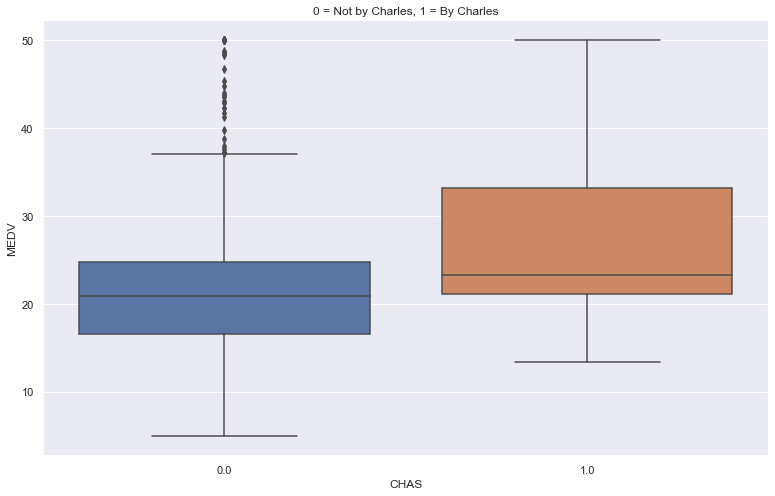

In [28]:
ax = sns.boxplot(x=df["CHAS"], y=df['MEDV']).set_title('0 = Not by Charles, 1 = By Charles')


<p>Here is where we get into the area of inferential statisitcs and t-tests.(https://www.youtube.com/watch?v=0Pd3dc1GcHc)</p>

<p>Inferential statistics can tell us what to expect in other data samples that we don't have - which is a very powerful insight. A t-test is a statistical hypotheses test that measures how significant (https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/) the differences between the groups are and whether any differences are down to chance.</p>

<p>To assess the real impact of location alongside the Charles River has on house value, we need to delve into some inferential statistics and conduct our own t-test. First step here is to import the SciPy package that has a built in t test functino.</p>

In [29]:
import scipy.stats as stats

<p>We then need to slice the dataframe into Charles and non-Charles sets.</p>

In [30]:
Noncharles = df[df['CHAS']== 0.0]
Charles = df[df['CHAS']== 1.0]

In [31]:
#verify our new datasets
Charles.count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
MEDV       35
dtype: int64

In [32]:
Noncharles.count()

CRIM       471
ZN         471
INDUS      471
CHAS       471
NOX        471
RM         471
AGE        471
DIS        471
RAD        471
TAX        471
PTRATIO    471
B          471
LSTAT      471
MEDV       471
dtype: int64

<p>Using a t-test, we can check if there is a significant difference between the means of our Charles and Noncharles datasets. The hypothesis being tested is:</p>

<ul><li><strong>Null hypothesis (H0):</strong> u1 = u2, which translates to the mean of Charles is equal to the mean of Noncharles</li>
<li><strong>Alternative hypothesis (HA):</strong> u1 ? u2, which translates to the mean of Charles is not equal to the mean of Noncharles</li></ul>

<p>We also set the p-value at 0.05 as is the cut-off point most commonly used in this type of test. If the test produces a p-value which is less than 0.05, then we can say that there is a significant difference between the two means - and reject the null hypothesis.</p>

In [33]:
#use SciPy t-test on our data
print(stats.ttest_ind(Charles['MEDV'], Noncharles['MEDV'] ))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


<p>As we can see, our p-value is less than 0.05 and we can see that there is a significant difference between the two means.</p>
<hr>

<h3><u>Section 3 - Predict</u></h3>


<p>Part 3 of this project involves building a neural network using keras that can predict the median house price based on the other variables in the dataset. First off, we need to import the keras module.</p>

In [34]:
import keras as kr

<p>We then need to split the data into input and output variables.</p>

In [40]:
# Input
X = df.drop(columns=["MEDV"])

# Output
Y = df["MEDV"]

In [38]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64